#### 세이프존과 캐릭터 거리 계산용 데이터 전처리

In [1]:
import pandas as pd
from datetime import datetime
import swifter

c:\Users\PC\Desktop\AI_Lab\pubg\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\data\tel0.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_9700\3913476499.py:1: DtypeWarning: Columns (24,26,30,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\data\tel0.csv')


In [3]:
df1=df[['_D','character.name', 'character.location.x', 'character.location.y', 'character.location.z','character.isInBlueZone']]
df2=df[['_D', 'common.isGame', 'gameState.safetyZoneRadius','gameState.safetyZonePosition.x', 'gameState.safetyZonePosition.y', 'gameState.safetyZonePosition.z']]

In [4]:
pwd

'c:\\Users\\PC\\Desktop\\AI_Lab\\pubg'

In [5]:
cd tel_processing

c:\Users\PC\Desktop\AI_Lab\pubg\tel_processing


c:\Users\PC\Desktop\AI_Lab\pubg\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
df1.to_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\tel_processing\character.csv', index=False)
df2.to_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\tel_processing\gameState.csv', index=False)

데이터 전처리

In [7]:
df1 = pd.read_csv('character.csv')
df2 = pd.read_csv('gameState.csv')

In [8]:
# df
# df2

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97339 entries, 0 to 97338
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _D                      97339 non-null  object 
 1   character.name          49960 non-null  object 
 2   character.location.x    49960 non-null  float64
 3   character.location.y    49960 non-null  float64
 4   character.location.z    49960 non-null  float64
 5   character.isInBlueZone  49960 non-null  object 
dtypes: float64(3), object(3)
memory usage: 4.5+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97339 entries, 0 to 97338
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   _D                              97339 non-null  object 
 1   common.isGame                   97338 non-null  float64
 2   gameState.safetyZoneRadius      176 non-null    float64
 3   gameState.safetyZonePosition.x  176 non-null    float64
 4   gameState.safetyZonePosition.y  176 non-null    float64
 5   gameState.safetyZonePosition.z  176 non-null    float64
dtypes: float64(5), object(1)
memory usage: 4.5+ MB


In [10]:
df1 = df1.dropna()
df2 = df2.dropna()

In [11]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
5,2023-12-01T10:45:21.247Z,NH_MMing,125273.140625,703364.812500,10763.201172,False
7,2023-12-01T10:45:21.266Z,GEN_Seongjang,124567.429688,701831.875000,10763.201172,False
9,2023-12-01T10:45:21.283Z,LG_Snakers,125034.640625,704196.187500,10763.201172,False
11,2023-12-01T10:45:21.301Z,CES_HaiSaki,125502.757812,702065.500000,10763.201172,False
14,2023-12-01T10:45:21.323Z,Tian_Zyy,124901.148438,702914.312500,10763.201172,False
...,...,...,...,...,...,...
97334,2023-12-01T11:50:45.342Z,T5_Hatsawat,404608.062500,215308.390625,6225.689941,False
97335,2023-12-01T11:50:49.007Z,T5_RossitedJR,411438.906250,217228.031250,4704.060059,False
97336,2023-12-01T11:50:52.825Z,T5_Thanad0l,413216.187500,213688.890625,4371.159668,False
97337,2023-12-01T11:50:53.337Z,T5_Hatsawat,404608.062500,215308.390625,6225.689941,False


In [12]:
# common.isGame = 자기장 페이즈 수치로 추정가능
df2[['_D', 'common.isGame', 'gameState.safetyZoneRadius']]['common.isGame'].unique()

array([0.1, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5,
       7. , 7.5, 8. , 8.5])

In [13]:
# 0.1 초기값 > 이후 int형에선 생존구역 정지 > float 에서 생존구역 중심좌표 이동 및 반지름 감소 시작
# for i in df2[['_D', 'common.isGame', 'gameState.safetyZoneRadius']]['common.isGame']:
#     print(i)

df2[30:50]

,_D,common.isGame,gameState.safetyZoneRadius,gameState.safetyZonePosition.x,gameState.safetyZonePosition.y,gameState.safetyZonePosition.z
27943,2023-12-01T11:25:16.690Z,1.0,581999.12500,408000.00000,408000.00000,0.0
28265,2023-12-01T11:25:26.696Z,1.0,581999.12500,408000.00000,408000.00000,0.0
28679,2023-12-01T11:25:36.680Z,1.0,581999.12500,408000.00000,408000.00000,0.0
29102,2023-12-01T11:25:46.721Z,1.5,568101.25000,409120.06250,402027.34375,0.0
29422,2023-12-01T11:25:56.705Z,1.5,554119.93750,410246.84375,396018.84375,0.0
29878,2023-12-01T11:26:06.693Z,1.5,540116.81250,411375.37500,390000.93750,0.0
30255,2023-12-01T11:26:16.664Z,1.5,526142.87500,412501.56250,383995.56250,0.0
30592,2023-12-01T11:26:26.708Z,1.5,512079.09375,413635.00000,377951.62500,0.0
30870,2023-12-01T11:26:36.674Z,1.5,498108.09375,414760.93750,371947.56250,0.0
31191,2023-12-01T11:26:46.677Z,1.5,484105.31250,415889.43750,365929.81250,0.0


In [14]:
df1['_D'] = pd.to_datetime(df1['_D']).dt.strftime('%H:%M:%S.%f').str[:-3]
df2['_D'] = pd.to_datetime(df2['_D']).dt.strftime('%H:%M:%S.%f').str[:-3]

In [15]:
df1.head()

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
5,10:45:21.247,NH_MMing,125273.140625,703364.8125,10763.201172,False
7,10:45:21.266,GEN_Seongjang,124567.429688,701831.8750,10763.201172,False
9,10:45:21.283,LG_Snakers,125034.640625,704196.1875,10763.201172,False
11,10:45:21.301,CES_HaiSaki,125502.757812,702065.5000,10763.201172,False
14,10:45:21.323,Tian_Zyy,124901.148438,702914.3125,10763.201172,False


In [16]:
#DNW 팀으로 분류
team_names = ['CES', 'LG', 'Tian', 'TL', 'SSG', 'NH', 'PeRo', 'GEN', 'T5', 'DNW', '17', 'SQ', 'DAY', 'FaZe', 'V7', 'TWIS']
team_dfs = [df1[df1['character.name'].str.contains(team)] for team in team_names]

filtered_dfs = {team: df1[df1['character.name'].str.contains(team)] for team in team_names}
filtered_dfs['DNW']

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
113,10:45:23.761,DNW_Salute,427304.06250,199421.140625,6603.814941,False
119,10:45:23.814,DNW_seoul,426574.25000,197576.109375,6603.814941,False
143,10:45:24.028,DNW_Loki,425627.40625,198444.421875,6603.814941,False
147,10:45:24.066,DNW_Inonix,426233.12500,197999.656250,6603.814941,False
154,10:45:24.658,DNW_Salute,427304.06250,199421.140625,6277.545410,False
...,...,...,...,...,...,...
83322,11:44:25.363,DNW_Salute,415447.46875,210576.562500,4442.480957,False
83323,11:44:25.364,DNW_Salute,415447.46875,210576.562500,4442.480957,False
83324,11:44:25.364,DNW_Salute,415447.46875,210576.562500,4442.480957,False
83325,11:44:25.365,DNW_Salute,415447.46875,210576.562500,4442.480957,False


In [17]:
#팀별 필터링 가능여부 점검
# for team_df in team_dfs:
#     display(team_df)

In [18]:
df['_D'].unique

<bound method Series.unique of 0        2023-12-01T11:20:06.4590672Z
1            2023-12-01T10:45:21.104Z
2            2023-12-01T10:45:21.112Z
3            2023-12-01T10:45:21.221Z
4            2023-12-01T10:45:21.227Z
                     ...             
97334        2023-12-01T11:50:45.342Z
97335        2023-12-01T11:50:49.007Z
97336        2023-12-01T11:50:52.825Z
97337        2023-12-01T11:50:53.337Z
97338        2023-12-01T11:50:56.996Z
Name: _D, Length: 97339, dtype: object>

In [19]:
#time_pattern 컬럼추가 
df['time_pattern'] = df['_D'].str.slice(0, 8)
df2['time_pattern'] = df2['_D'].str.slice(0, 8)

In [20]:
# 방법 1. _D 값에 따라 데이터프레임 결합 > 문제점 발견
sum_df = pd.merge(df, df2, on='_D')
sum_df

,_D,common.isGame_x,character.isInBlueZone,character.name,character.location.x,character.location.y,character.location.z,elapsedTime,numAlivePlayers,weapon.category,...,allWeaponStats.stats.hitDetails.damage,allWeaponStats.stats.hitDetails.hits,allWeaponStats.stats.hitDetails.kills,time_pattern_x,common.isGame_y,gameState.safetyZoneRadius_y,gameState.safetyZonePosition.x_y,gameState.safetyZonePosition.y_y,gameState.safetyZonePosition.z_y,time_pattern_y


- 1경기에 64명이 뛰는데 일치하는 값만 찾을수밖에 없다보니 24개 데이터만 나옴 + 초기값이 합쳐짐
- 전체 데이터로 확장시 scaatter plot은 그려볼 수 있을지 몰라도 의미 있는 데이터로 보긴 어려울듯함

다른 방법을 찾아야함

아이디어 : 안전구역 중심부를 구해서 
- 페이즈별로 자기장이 움직인 후 멈춤 = 페이즈 진행전 이미 안전구역이 설정됨

임시 용어정의
- bluezone : 자기장 외부로 
- whitecircle : 페이즈 진행시 줄어들기로 약속된 
- 생존구역 : bluezone 과 whitecircle 사이 

아래 단계에 따라 나누기

1. gameState.safetyZoneRadius.1 값이 변하는 지점 찾기
- phase_start time : 

In [21]:
#timepattern 없는 데이터로 다시정의
df1 = pd.read_csv('character.csv')
df2 = pd.read_csv('gameState.csv')

df1 = df1.dropna()
df2 = df2.dropna()

df1['_D'] = pd.to_datetime(df1['_D']).dt.strftime('%H:%M:%S.%f').str[:-3]
df2['_D'] = pd.to_datetime(df2['_D']).dt.strftime('%H:%M:%S.%f').str[:-3]

In [22]:
df2[31:35]

,_D,common.isGame,gameState.safetyZoneRadius,gameState.safetyZonePosition.x,gameState.safetyZonePosition.y,gameState.safetyZonePosition.z
28265,11:25:26.696,1.0,581999.1250,408000.00000,408000.00000,0.0
28679,11:25:36.680,1.0,581999.1250,408000.00000,408000.00000,0.0
29102,11:25:46.721,1.5,568101.2500,409120.06250,402027.34375,0.0
29422,11:25:56.705,1.5,554119.9375,410246.84375,396018.84375,0.0


In [23]:
df2[58:62]

,_D,common.isGame,gameState.safetyZoneRadius,gameState.safetyZonePosition.x,gameState.safetyZonePosition.y,gameState.safetyZonePosition.z
37198,11:29:56.680,1.5,217880.84375,437345.00000,251518.906250,0.0
37423,11:30:06.724,1.5,203815.78125,438478.53125,245474.406250,0.0
37658,11:30:16.702,2.0,203699.68750,438487.87500,245424.515625,0.0
37987,11:30:26.749,2.0,203699.68750,438487.87500,245424.515625,0.0


In [24]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
5,10:45:21.247,NH_MMing,125273.140625,703364.812500,10763.201172,False
7,10:45:21.266,GEN_Seongjang,124567.429688,701831.875000,10763.201172,False
9,10:45:21.283,LG_Snakers,125034.640625,704196.187500,10763.201172,False
11,10:45:21.301,CES_HaiSaki,125502.757812,702065.500000,10763.201172,False
14,10:45:21.323,Tian_Zyy,124901.148438,702914.312500,10763.201172,False
...,...,...,...,...,...,...
97334,11:50:45.342,T5_Hatsawat,404608.062500,215308.390625,6225.689941,False
97335,11:50:49.007,T5_RossitedJR,411438.906250,217228.031250,4704.060059,False
97336,11:50:52.825,T5_Thanad0l,413216.187500,213688.890625,4371.159668,False
97337,11:50:53.337,T5_Hatsawat,404608.062500,215308.390625,6225.689941,False


In [25]:
df2_test = df2[['_D','common.isGame','gameState.safetyZoneRadius']]
df2_test

,_D,common.isGame,gameState.safetyZoneRadius
14452,11:20:16.798,0.1,581999.125000
14518,11:20:26.641,0.1,581999.125000
14601,11:20:36.669,0.1,581999.125000
14687,11:20:46.639,0.1,581999.125000
14768,11:20:56.664,0.1,581999.125000
...,...,...,...
86883,11:48:46.645,8.0,11076.323242
87442,11:48:56.640,8.0,11076.323242
87469,11:49:06.654,8.0,11076.323242
88214,11:49:16.660,8.5,10660.581055


In [26]:
df2_start = df2_test.drop_duplicates('common.isGame', keep='first')
df2_end = df2_test.drop_duplicates('common.isGame', keep='last')

In [27]:
df2_start.head()

,_D,common.isGame,gameState.safetyZoneRadius
14452,11:20:16.798,0.1,581999.12500
16323,11:21:46.701,1.0,581999.12500
29102,11:25:46.721,1.5,568101.25000
37658,11:30:16.702,2.0,203699.68750
42306,11:31:46.669,2.5,196419.09375


In [28]:
df2_end.head()

,_D,common.isGame,gameState.safetyZoneRadius
15771,11:21:36.691,0.1,581999.125000
28679,11:25:36.680,1.0,581999.125000
37423,11:30:06.724,1.5,203815.781250
41969,11:31:36.666,2.0,203699.687500
46013,11:33:36.699,2.5,112364.085938


In [29]:
df2_phase = pd.merge(df2_start, df2_end, on='common.isGame')
df2_phase

,_D_x,common.isGame,gameState.safetyZoneRadius_x,_D_y,gameState.safetyZoneRadius_y
0,11:20:16.798,0.1,581999.125000,11:21:36.691,581999.125000
1,11:21:46.701,1.0,581999.125000,11:25:36.680,581999.125000
2,11:25:46.721,1.5,568101.250000,11:30:06.724,203815.781250
3,11:30:16.702,2.0,203699.687500,11:31:36.666,203699.687500
4,11:31:46.669,2.5,196419.093750,11:33:36.699,112364.085938
5,11:33:46.718,3.0,112034.828125,11:34:36.730,112034.828125
6,11:34:46.743,3.5,108581.250000,11:36:36.663,67528.804688
7,11:36:46.726,4.0,67220.898438,11:37:36.674,67220.898438
8,11:37:46.719,4.5,65273.726562,11:39:36.730,40621.937500
9,11:39:46.697,5.0,40332.539062,11:40:36.658,40332.539062


In [30]:
df2_phase = df2_phase[['common.isGame','_D_x','_D_y']]

In [31]:
# 시간이 얼추 10초단위로 기록됨
df2_phase.columns = ['phase','start_time','end_time']
df2_phase

# 게임시작후 1분30초뒤 첫번째 자기장 결정 > 1.0 startime

,phase,start_time,end_time
0,0.1,11:20:16.798,11:21:36.691
1,1.0,11:21:46.701,11:25:36.680
2,1.5,11:25:46.721,11:30:06.724
3,2.0,11:30:16.702,11:31:36.666
4,2.5,11:31:46.669,11:33:36.699
5,3.0,11:33:46.718,11:34:36.730
6,3.5,11:34:46.743,11:36:36.663
7,4.0,11:36:46.726,11:37:36.674
8,4.5,11:37:46.719,11:39:36.730
9,5.0,11:39:46.697,11:40:36.658


In [32]:
print(df2_phase['phase'].unique())

[0.1 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5]


페이즈별 시간에 따라 판단 후 gameState 값 넣는 함수 만들기

In [33]:
# _D값 비교가능하게 float화하는 함수
def time_to_float(row):
    time_data = row['_D']
    hours, minutes, seconds = map(float, time_data.split(':'))
    time_data = hours * 3600 + minutes * 60 + seconds

    return  time_data

In [34]:
# character _D 값 수치화
player_time = df1.apply(time_to_float, axis=1)
player_time_list = player_time.to_list()
player_time_list

[38721.247,
 38721.266,
 38721.283,
 38721.301,
 38721.323,
 38721.339,
 38721.367,
 38721.385,
 38721.403,
 38721.425,
 38721.444,
 38721.472,
 38721.491,
 38721.513,
 38721.535,
 38721.555,
 38721.571,
 38721.586,
 38721.603,
 38721.629,
 38721.643,
 38721.663,
 38721.685,
 38721.718,
 38721.734,
 38721.751,
 38721.766,
 38721.783,
 38721.802,
 38721.828,
 38721.86,
 38721.878,
 38721.894,
 38721.916,
 38721.939,
 38721.96,
 38721.99,
 38722.007,
 38722.04,
 38722.063,
 38722.103,
 38722.145,
 38723.004,
 38723.004,
 38723.004,
 38723.004,
 38723.761,
 38723.779,
 38723.795,
 38723.814,
 38723.832,
 38723.855,
 38723.873,
 38723.89,
 38723.908,
 38723.924,
 38723.94,
 38723.959,
 38723.975,
 38723.993,
 38724.011,
 38724.028,
 38724.045,
 38724.066,
 38724.084,
 38724.109,
 38724.349,
 38724.657,
 38724.658,
 38724.878,
 38724.878,
 38724.991,
 38724.991,
 38725.227,
 38725.32,
 38725.422,
 38725.519,
 38725.519,
 38725.9,
 38725.9,
 38726.336,
 38726.385,
 38726.647,
 38727.165,
 38

In [35]:
start_time = df2_start.apply(time_to_float, axis=1)
start_time_list = start_time.to_list()
start_time_list

[40816.798,
 40906.701,
 41146.721,
 41416.702,
 41506.669,
 41626.718,
 41686.743,
 41806.726,
 41866.719,
 41986.697,
 42046.732,
 42166.653,
 42226.674,
 42346.662,
 42406.653,
 42496.663,
 42556.66]

In [36]:
end_time = df2_end.apply(time_to_float, axis=1)
end_time_list = end_time.to_list()
end_time_list

[40896.691,
 41136.68,
 41406.724,
 41496.666,
 41616.699,
 41676.73,
 41796.663,
 41856.674,
 41976.73,
 42036.658,
 42156.654,
 42216.678,
 42336.661,
 42396.648,
 42486.659,
 42546.654,
 42566.644]

In [37]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
5,10:45:21.247,NH_MMing,125273.140625,703364.812500,10763.201172,False
7,10:45:21.266,GEN_Seongjang,124567.429688,701831.875000,10763.201172,False
9,10:45:21.283,LG_Snakers,125034.640625,704196.187500,10763.201172,False
11,10:45:21.301,CES_HaiSaki,125502.757812,702065.500000,10763.201172,False
14,10:45:21.323,Tian_Zyy,124901.148438,702914.312500,10763.201172,False
...,...,...,...,...,...,...
97334,11:50:45.342,T5_Hatsawat,404608.062500,215308.390625,6225.689941,False
97335,11:50:49.007,T5_RossitedJR,411438.906250,217228.031250,4704.060059,False
97336,11:50:52.825,T5_Thanad0l,413216.187500,213688.890625,4371.159668,False
97337,11:50:53.337,T5_Hatsawat,404608.062500,215308.390625,6225.689941,False


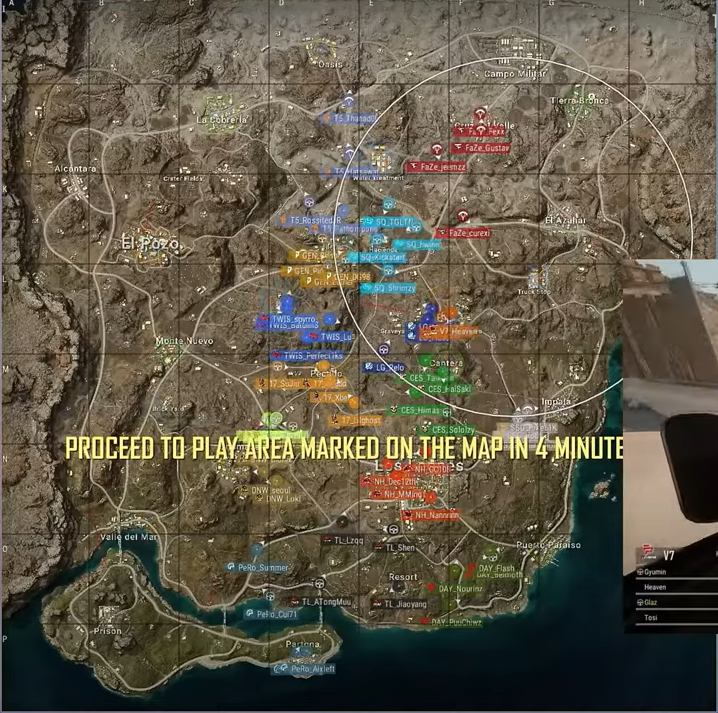

결국 처음 자기장이 정해지는 시간 기준으로 위 데이터는 날려야하나?
- why? 어차피 첫데이터가 수송기부터 있어서 사라짐
- 거리의 평균을 내버릴 때 수송기랑 자기장간 거리가 데이터 왜곡할듯함


방법 1. 안전지역 결정 이전 시점 제거
- 적게 시간 들이고 전처리가능
- but 낙하지점, 첫 탑승지점 데이터와의 중복 발생 > 방법 2 구현 못할시 사용

방법 2. 플레이어 낙하시점 기준 이전 시점 제거
- 구현만 된다면 낙하 이후 운영을 살펴볼 수 있음
- 어렵지면 구현 시도

In [38]:
# 방법 1. prephase(안전지역 결정 이전전) 시점 제거함수 
def delete_prephase_1(row):
    player_time = row['_D']
    hours, minutes, seconds = map(float, player_time.split(':'))
    player_time = hours * 3600 + minutes * 60 + seconds

    return player_time>= start_time_list[1]
        
df1[df1.apply(delete_prephase_1,axis=1)]

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
16324,11:21:46.740,V7_Glaz,531114.81250,366788.906250,9432.629883,False
16325,11:21:46.740,V7_Glaz,531114.81250,366788.906250,9432.629883,False
16326,11:21:46.746,TL_ATongMuu,634363.50000,268241.218750,5799.199707,False
16327,11:21:46.767,NH_Nannnnn,515366.09375,479661.656250,14936.359375,False
16328,11:21:46.810,17_xwudd,371513.43750,423392.343750,6460.129883,False
...,...,...,...,...,...,...
97334,11:50:45.342,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False
97335,11:50:49.007,T5_RossitedJR,411438.90625,217228.031250,4704.060059,False
97336,11:50:52.825,T5_Thanad0l,413216.18750,213688.890625,4371.159668,False
97337,11:50:53.337,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False


In [39]:
# 방법 2 진행전 낙하위치 및 시간산출하기

df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\data\tel0.csv')
df3=df[['_D','character.name', 'character.location.x', 'character.location.y', 'character.location.z','item.itemId']]

C:\Users\PC\AppData\Local\Temp\ipykernel_9700\4158052356.py:3: DtypeWarning: Columns (24,26,30,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\data\tel0.csv')


In [40]:
df3 = df3.dropna()
df3

,_D,character.name,character.location.x,character.location.y,character.location.z,item.itemId
14005,2023-12-01T11:20:06.148Z,LG_Fludd,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14006,2023-12-01T11:20:06.148Z,LG_Fludd,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14008,2023-12-01T11:20:06.149Z,LG_Snakers,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14009,2023-12-01T11:20:06.149Z,LG_Snakers,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14011,2023-12-01T11:20:06.150Z,LG_Relo,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
...,...,...,...,...,...,...
97314,2023-12-01T11:50:27.453Z,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Back_C_02_Lv3_C
97315,2023-12-01T11:50:27.453Z,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Weapon_FNFal_C
97316,2023-12-01T11:50:27.453Z,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Weapon_BerylM762_C
97317,2023-12-01T11:50:27.453Z,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Weapon_Pan_C


In [41]:
df3['_D'] = pd.to_datetime(df3['_D']).dt.strftime('%H:%M:%S.%f').str[:-3]

In [42]:
df3

,_D,character.name,character.location.x,character.location.y,character.location.z,item.itemId
14005,11:20:06.148,LG_Fludd,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14006,11:20:06.148,LG_Fludd,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14008,11:20:06.149,LG_Snakers,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14009,11:20:06.149,LG_Snakers,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
14011,11:20:06.150,LG_Relo,984378.00000,381234.34375,150208.000000,Item_Back_B_01_StartParachutePack_C
...,...,...,...,...,...,...
97314,11:50:27.453,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Back_C_02_Lv3_C
97315,11:50:27.453,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Weapon_FNFal_C
97316,11:50:27.453,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Weapon_BerylM762_C
97317,11:50:27.453,FaZe_jeemzz,415352.71875,210693.78125,4439.371094,Item_Weapon_Pan_C


In [43]:
df3 = df3[df3['item.itemId'] == 'Item_Back_B_01_StartParachutePack_C']

In [44]:
df3 = df3.drop_duplicates(subset='character.name', keep='last')

In [45]:
# 선수별 낙하위치 및 시간 데이터 산출완료
df3

,_D,character.name,character.location.x,character.location.y,character.location.z,item.itemId
14819,11:21:03.132,TL_Jiaoyang,605780.87500,366935.437500,10457.629883,Item_Back_B_01_StartParachutePack_C
14849,11:21:06.992,TL_Lzqq,644191.00000,264852.031250,6414.707520,Item_Back_B_01_StartParachutePack_C
14881,11:21:09.653,V7_Gyumin,512450.31250,362163.375000,12157.847656,Item_Back_B_01_StartParachutePack_C
14883,11:21:09.685,V7_Tosi,513454.90625,361667.562500,12003.504883,Item_Back_B_01_StartParachutePack_C
14912,11:21:11.753,TL_Shen,564564.31250,298073.906250,12544.645508,Item_Back_B_01_StartParachutePack_C
...,...,...,...,...,...,...
18004,11:22:12.659,DNW_Inonix,293784.43750,486528.656250,8965.875977,Item_Back_B_01_StartParachutePack_C
51841,11:35:17.545,SSG_PaG3,402796.37500,166575.718750,4366.081055,Item_Back_B_01_StartParachutePack_C
52318,11:35:21.281,SSG_Roth,418312.25000,189524.671875,6115.812012,Item_Back_B_01_StartParachutePack_C
52425,11:35:23.475,SSG_Sharpshot4K,416697.43750,186477.484375,6085.400391,Item_Back_B_01_StartParachutePack_C


In [46]:
df3[['_D','character.name','item.itemId']]

,_D,character.name,item.itemId
14819,11:21:03.132,TL_Jiaoyang,Item_Back_B_01_StartParachutePack_C
14849,11:21:06.992,TL_Lzqq,Item_Back_B_01_StartParachutePack_C
14881,11:21:09.653,V7_Gyumin,Item_Back_B_01_StartParachutePack_C
14883,11:21:09.685,V7_Tosi,Item_Back_B_01_StartParachutePack_C
14912,11:21:11.753,TL_Shen,Item_Back_B_01_StartParachutePack_C
...,...,...,...
18004,11:22:12.659,DNW_Inonix,Item_Back_B_01_StartParachutePack_C
51841,11:35:17.545,SSG_PaG3,Item_Back_B_01_StartParachutePack_C
52318,11:35:21.281,SSG_Roth,Item_Back_B_01_StartParachutePack_C
52425,11:35:23.475,SSG_Sharpshot4K,Item_Back_B_01_StartParachutePack_C


In [47]:
landing_time = df3.apply(time_to_float, axis=1)
landing_time_list = landing_time.to_list()
landing_time_list

[40863.132,
 40866.992,
 40869.653,
 40869.685,
 40871.753,
 40871.932,
 40872.05,
 40873.468,
 40873.911,
 40874.453,
 40874.716,
 40877.759,
 40877.945,
 40878.049,
 40878.142,
 40878.675,
 40879.346,
 40880.098,
 40881.139,
 40881.637,
 40882.308,
 40882.979,
 40883.485,
 40885.51,
 40885.911,
 40886.773,
 40887.714,
 40887.951,
 40889.951,
 40890.418,
 40890.423,
 40892.077,
 40892.189,
 40893.784,
 40893.897,
 40894.222,
 40894.451,
 40895.248,
 40895.539,
 40896.662,
 40896.936,
 40896.937,
 40897.194,
 40898.304,
 40898.359,
 40899.018,
 40900.788,
 40900.856,
 40901.237,
 40902.201,
 40902.959,
 40903.851,
 40906.078,
 40907.32,
 40915.349,
 40919.848,
 40921.663,
 40925.823,
 40926.952,
 40932.659,
 41717.545,
 41721.281,
 41723.475,
 41725.385]

In [48]:
player_name='SSG_PiXeL1K'

In [49]:
landing_time = df3[df3['character.name'].str.contains(player_name)]['_D'].to_list()[0]
landing_time


'11:35:25.385'

In [50]:
def delete_prephase(row):
    player_time = row['_D']
    player_name = row['character.name']
    hours, minutes, seconds = map(float, player_time.split(':'))
    player_time = hours * 3600 + minutes * 60 + seconds
    
    landing_time = df3[df3['character.name'].str.contains(player_name)]['_D'].to_list()[0]
    hours, minutes, seconds = map(float, landing_time.split(':'))
    landing_time = hours * 3600 + minutes * 60 + seconds

    for name in df3['character.name']:
        if name == row['character.name']:
            return player_time >= landing_time

In [51]:
df1 = df1[df1.swifter.apply(delete_prephase,axis=1)]

Pandas Apply: 100%|██████████| 49960/49960 [00:24<00:00, 2016.33it/s]


In [52]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
14819,11:21:03.132,TL_Jiaoyang,605780.87500,366935.437500,10457.629883,False
14820,11:21:03.133,TL_Jiaoyang,605888.00000,366900.062500,10551.200195,False
14822,11:21:03.651,TL_Jiaoyang,605379.68750,367114.625000,9876.229492,False
14835,11:21:05.326,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False
14837,11:21:05.448,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False
...,...,...,...,...,...,...
97334,11:50:45.342,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False
97335,11:50:49.007,T5_RossitedJR,411438.90625,217228.031250,4704.060059,False
97336,11:50:52.825,T5_Thanad0l,413216.18750,213688.890625,4371.159668,False
97337,11:50:53.337,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False


방법 2로 산출가능하여 하기로 결정. 
- 연산시간이 좀 걸리지만 실효성 있는 데이터가 나을듯

In [53]:
df2_phase

,phase,start_time,end_time
0,0.1,11:20:16.798,11:21:36.691
1,1.0,11:21:46.701,11:25:36.680
2,1.5,11:25:46.721,11:30:06.724
3,2.0,11:30:16.702,11:31:36.666
4,2.5,11:31:46.669,11:33:36.699
5,3.0,11:33:46.718,11:34:36.730
6,3.5,11:34:46.743,11:36:36.663
7,4.0,11:36:46.726,11:37:36.674
8,4.5,11:37:46.719,11:39:36.730
9,5.0,11:39:46.697,11:40:36.658


In [54]:
print(player_time_list)
print(start_time_list)
print(end_time_list)

[38721.247, 38721.266, 38721.283, 38721.301, 38721.323, 38721.339, 38721.367, 38721.385, 38721.403, 38721.425, 38721.444, 38721.472, 38721.491, 38721.513, 38721.535, 38721.555, 38721.571, 38721.586, 38721.603, 38721.629, 38721.643, 38721.663, 38721.685, 38721.718, 38721.734, 38721.751, 38721.766, 38721.783, 38721.802, 38721.828, 38721.86, 38721.878, 38721.894, 38721.916, 38721.939, 38721.96, 38721.99, 38722.007, 38722.04, 38722.063, 38722.103, 38722.145, 38723.004, 38723.004, 38723.004, 38723.004, 38723.761, 38723.779, 38723.795, 38723.814, 38723.832, 38723.855, 38723.873, 38723.89, 38723.908, 38723.924, 38723.94, 38723.959, 38723.975, 38723.993, 38724.011, 38724.028, 38724.045, 38724.066, 38724.084, 38724.109, 38724.349, 38724.657, 38724.658, 38724.878, 38724.878, 38724.991, 38724.991, 38725.227, 38725.32, 38725.422, 38725.519, 38725.519, 38725.9, 38725.9, 38726.336, 38726.385, 38726.647, 38727.165, 38727.233, 38727.359, 38727.495, 38727.742, 38727.877, 38728.148, 38728.467, 38728.662

In [55]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone
14819,11:21:03.132,TL_Jiaoyang,605780.87500,366935.437500,10457.629883,False
14820,11:21:03.133,TL_Jiaoyang,605888.00000,366900.062500,10551.200195,False
14822,11:21:03.651,TL_Jiaoyang,605379.68750,367114.625000,9876.229492,False
14835,11:21:05.326,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False
14837,11:21:05.448,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False
...,...,...,...,...,...,...
97334,11:50:45.342,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False
97335,11:50:49.007,T5_RossitedJR,411438.90625,217228.031250,4704.060059,False
97336,11:50:52.825,T5_Thanad0l,413216.18750,213688.890625,4371.159668,False
97337,11:50:53.337,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False


In [56]:
# def add_gameStates(row):

#     # df1['phase'] = ''
#     # df1['whitecircle.location.x'] = ''
#     # df1['whitecircle.location.y'] = ''
#     # df1['whitecircle.radius'] = ''
    
#     player_time = row['_D']
#     hours, minutes, seconds = map(float, player_time.split(':'))
#     player_time = hours * 3600 + minutes * 60 + seconds

    
#     safez_phase1 = df2_phase['start_time'][3]
#     hours, minutes, seconds = map(float, safez_phase1.split(':'))
#     safez_phase1_time = hours * 3600 + minutes * 60 + seconds

#     safez_phase2 = df2_phase['start_time'][5]
#     hours, minutes, seconds = map(float, safez_phase2.split(':'))
#     safez_phase2_time = hours * 3600 + minutes * 60 + seconds

#     safez_phase3 = df2_phase['start_time'][7]
#     hours, minutes, seconds = map(float, safez_phase3.split(':'))
#     safez_phase3_time = hours * 3600 + minutes * 60 + seconds

#     safez_phase4 = df2_phase['start_time'][9]
#     hours, minutes, seconds = map(float, safez_phase4.split(':'))
#     safez_phase4_time = hours * 3600 + minutes * 60 + seconds

#     safez_phase5 = df2_phase['start_time'][11]
#     hours, minutes, seconds = map(float, safez_phase5.split(':'))
#     safez_phase5_time = hours * 3600 + minutes * 60 + seconds

#     safez_phase6 = df2_phase['start_time'][13]
#     hours, minutes, seconds = map(float, safez_phase6.split(':'))
#     safez_phase6_time = hours * 3600 + minutes * 60 + seconds

#     safez_phase7 = df2_phase['start_time'][15]
#     hours, minutes, seconds = map(float, safez_phase7.split(':'))
#     safez_phase7_time = hours * 3600 + minutes * 60 + seconds

#     # phase_times = [df2_phase['start_time'][i] for i in range(3, 16, 2)]
#     # safez_phases = [hours * 3600 + minutes * 60 + seconds for phase in phase_times for hours, minutes, seconds in [map(float, phase.split(':'))]]

    
#     if player_time <= safez_phase1_time:
    
#         phase = float(df2[df2['_D'].str.contains(safez_phase1)]['common.isGame'].to_list()[0])-1.0
#         whitecircle_location_x = df2[df2['_D'].str.contains(safez_phase1)]['gameState.safetyZonePosition.x'].to_list()[0]
#         whitecircle_location_y = df2[df2['_D'].str.contains(safez_phase1)]['gameState.safetyZonePosition.y'].to_list()[0]
#         whitecircle_radius = df2[df2['_D'].str.contains(safez_phase1)]['gameState.safetyZoneRadius'].to_list()[0]

#         return phase, whitecircle_location_x, whitecircle_location_y, whitecircle_radius

#     # elif player_time <= safez_phase7:
#     #     row['phase'] = float(df2[df2['_D'].str.contains(safez_phase7)]['common.isGame'].to_list()[0])-1.0
#     #     row['whitecircle.location.x'] = df2[df2['_D'].str.contains(safez_phase7)]['gameState.safetyZonePosition.x'].to_list()[0]
#     #     row['whitecircle.location.y'] = df2[df2['_D'].str.contains(safez_phase7)]['gameState.safetyZonePosition.y'].to_list()[0]
#     #     row['whitecircle.radius'] = df2[df2['_D'].str.contains(safez_phase7)]['gameState.safetyZoneRadius'].to_list()[0]
    
#     # else:
#     #     row['phase'] = float(df2[df2['_D'].str.contains(safez_phase7)]['common.isGame'].to_list()[0])-1.0
#     #     row['whitecircle.location.x'] = df2[df2['_D'].str.contains(safez_phase7)]['gameState.safetyZonePosition.x'].to_list()[0]
#     #     row['whitecircle.location.y'] = df2[df2['_D'].str.contains(safez_phase7)]['gameState.safetyZonePosition.y'].to_list()[0]
#     #     row['whitecircle.radius'] = df2[df2['_D'].str.contains(safez_phase7)]['gameState.safetyZoneRadius'].to_list()[0]

In [57]:
def add_gameStates(row):

    player_time = row['_D']
    hours, minutes, seconds = map(float, player_time.split(':'))
    player_time = hours * 3600 + minutes * 60 + seconds

    safez_phases = [df2_phase['start_time'][i] for i in range(3, 16, 2)]
    safez_phase_times = [hours * 3600 + minutes * 60 + seconds for phase in safez_phases for hours, minutes, seconds in [map(float, phase.split(':'))]]

    for i in range(0,len(safez_phase_times)):
        if player_time <= safez_phase_times[i]:
            phase = float(df2[df2['_D'].str.contains(safez_phases[i])]['common.isGame'].to_list()[0])-1.0
            whitecircle_location_x = df2[df2['_D'].str.contains(safez_phases[i])]['gameState.safetyZonePosition.x'].to_list()[0]
            whitecircle_location_y = df2[df2['_D'].str.contains(safez_phases[i])]['gameState.safetyZonePosition.y'].to_list()[0]
            whitecircle_radius = df2[df2['_D'].str.contains(safez_phases[i])]['gameState.safetyZoneRadius'].to_list()[0]

            return phase, whitecircle_location_x, whitecircle_location_y, whitecircle_radius
        
    if player_time > safez_phase_times[6]:
        phase = float(df2[df2['_D'].str.contains(safez_phases[6])]['common.isGame'].to_list()[0])-1.0
        whitecircle_location_x = df2[df2['_D'].str.contains(safez_phases[6])]['gameState.safetyZonePosition.x'].to_list()[0]
        whitecircle_location_y = df2[df2['_D'].str.contains(safez_phases[6])]['gameState.safetyZonePosition.y'].to_list()[0]
        whitecircle_radius = df2[df2['_D'].str.contains(safez_phases[6])]['gameState.safetyZoneRadius'].to_list()[0]

        return phase, whitecircle_location_x, whitecircle_location_y, whitecircle_radius

In [58]:
df1[['phase', 'whitecircle_location_x', 'whitecircle_location_y', 'whitecircle_radius']] = df1.swifter.apply(add_gameStates, axis=1, result_type='expand')

Pandas Apply: 100%|██████████| 33833/33833 [00:58<00:00, 579.30it/s]
C:\Users\PC\AppData\Local\Temp\ipykernel_9700\3239937555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['phase', 'whitecircle_location_x', 'whitecircle_location_y', 'whitecircle_radius']] = df1.swifter.apply(add_gameStates, axis=1, result_type='expand')
C:\Users\PC\AppData\Local\Temp\ipykernel_9700\3239937555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['phase', 'whitecircle_location_x', 'whitecircle_location_y', 'whi

In [59]:
df1

,_D,character.name,character.location.x,character.location.y,character.location.z,character.isInBlueZone,phase,whitecircle_location_x,whitecircle_location_y,whitecircle_radius
14819,11:21:03.132,TL_Jiaoyang,605780.87500,366935.437500,10457.629883,False,1.0,438487.87500,245424.515625,203699.687500
14820,11:21:03.133,TL_Jiaoyang,605888.00000,366900.062500,10551.200195,False,1.0,438487.87500,245424.515625,203699.687500
14822,11:21:03.651,TL_Jiaoyang,605379.68750,367114.625000,9876.229492,False,1.0,438487.87500,245424.515625,203699.687500
14835,11:21:05.326,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False,1.0,438487.87500,245424.515625,203699.687500
14837,11:21:05.448,TL_Jiaoyang,605124.12500,367265.593750,9903.726562,False,1.0,438487.87500,245424.515625,203699.687500
...,...,...,...,...,...,...,...,...,...,...
97334,11:50:45.342,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False,7.0,410221.46875,213685.875000,11076.323242
97335,11:50:49.007,T5_RossitedJR,411438.90625,217228.031250,4704.060059,False,7.0,410221.46875,213685.875000,11076.323242
97336,11:50:52.825,T5_Thanad0l,413216.18750,213688.890625,4371.159668,False,7.0,410221.46875,213685.875000,11076.323242
97337,11:50:53.337,T5_Hatsawat,404608.06250,215308.390625,6225.689941,False,7.0,410221.46875,213685.875000,11076.323242


In [60]:
df1['whitecircle_location_x'].unique()

array([438487.875  , 373675.71875, 393699.125  , 405977.71875,
       410590.34375, 412775.46875, 410221.46875])

<class 'pandas.core.frame.DataFrame'>
Index: 33833 entries, 14819 to 97338
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _D                      33833 non-null  object 
 1   character.name          33833 non-null  object 
 2   character.location.x    33833 non-null  float64
 3   character.location.y    33833 non-null  float64
 4   character.location.z    33833 non-null  float64
 5   character.isInBlueZone  33833 non-null  object 
 6   phase                   33833 non-null  float64
 7   whitecircle_location_x  33833 non-null  float64
 8   whitecircle_location_y  33833 non-null  float64
 9   whitecircle_radius      33833 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.8+ MB
